# check Langleys

In [1]:
import atmPy.radiation.retrievals.langley_calibration as atmlc
import atmPy.radiation.retrievals.spectral_irradiance as atmspec
import atmPy.aerosols.physics.column_optical_properties as atmcop
import helpers

In [2]:
reload(atmspec)
reload(atmspec.atmlangcalib)

<module 'atmPy.radiation.retrievals.langley_calibration' from '/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py'>

In [3]:
prefix = '/Users/htelg'

## 648

In [44]:
reload(atmlc)

<module 'atmPy.radiation.retrievals.langley_calibration' from '/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py'>

In [45]:
p2fld = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.3/')


lt = atmlc.open_langleys(p2fld)
lt_pre_648 = lt

Text(0.5, 1.0, '1625')

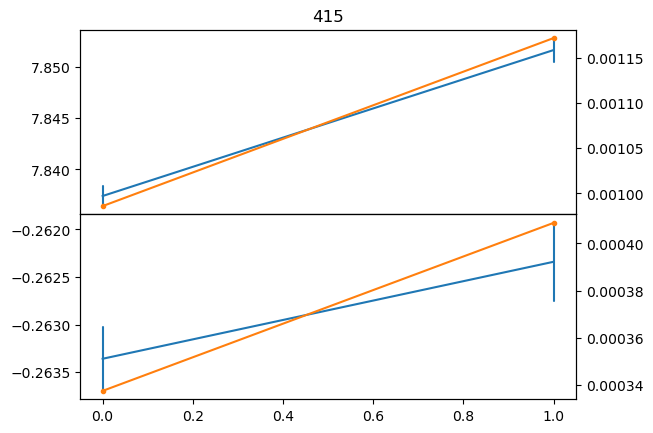

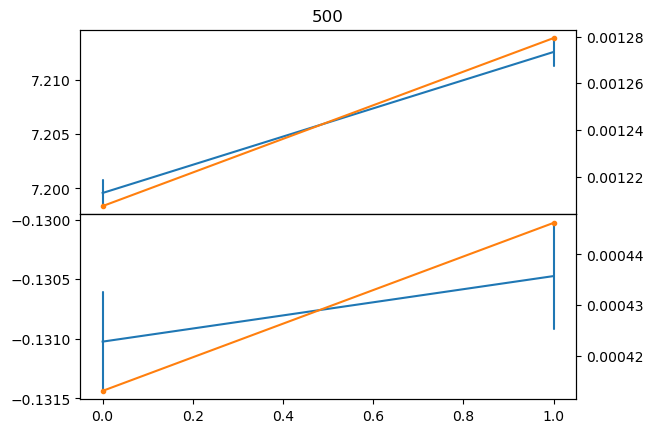

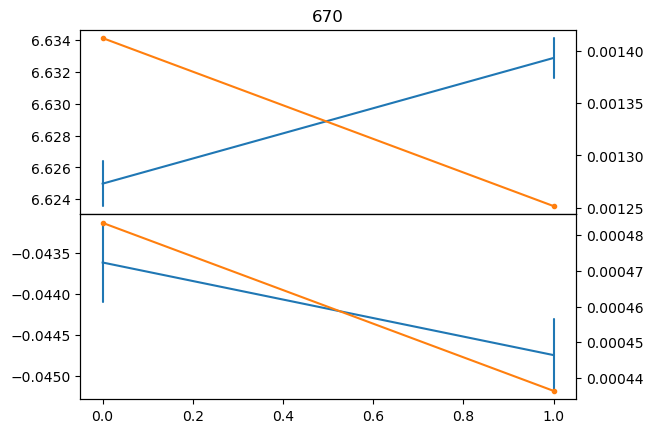

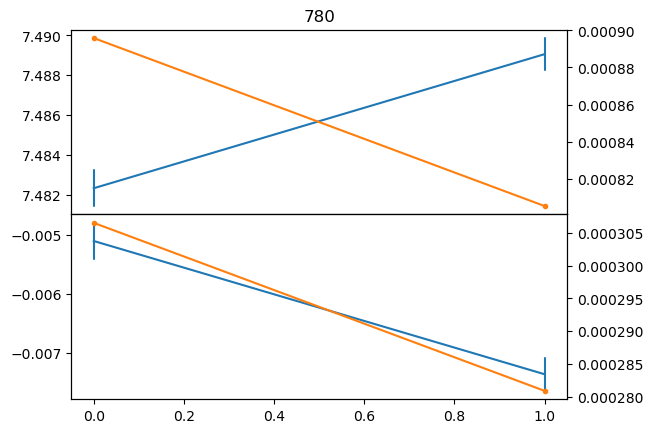

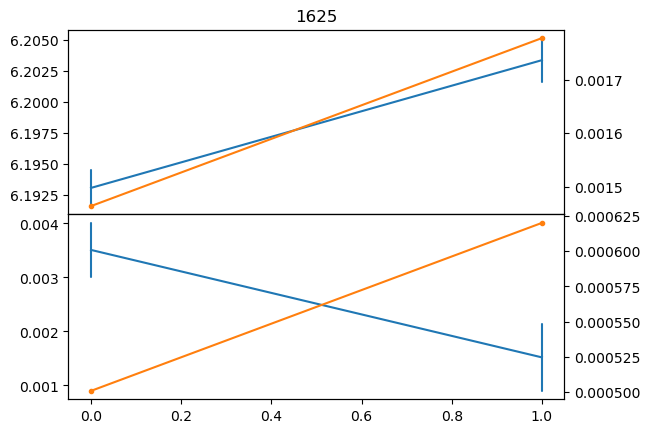

In [46]:
f,a = lt.plot_sorted(wl = 415, wlsort=500)
a[0].set_title('415')
f,a = lt.plot_sorted(wl = 500)
a[0].set_title('500')
f,a = lt.plot_sorted(wl = 670, wlsort=500)
a[0].set_title('670')
f,a = lt.plot_sorted(wl = 870, wlsort=500)
a[0].set_title('780')
f,a = lt.plot_sorted(wl = 1625, wlsort=500)
a[0].set_title('1625')

In [7]:
lt.V0_simple

<xarray.Dataset> Size: 240B
Dimensions:         (wavelength: 6)
Coordinates:
  * wavelength      (wavelength) int64 48B 415 500 670 870 940 1625
Data variables:
    V0              (wavelength) float64 48B 2.551e+03 1.348e+03 ... 492.1
    V0_std          (wavelength) float64 48B 11.38 6.143 2.458 5.102 43.2 2.268
    OD_uncertainty  (wavelength) float64 48B 0.004464 0.004559 ... 0.004608
    V0_stderr       (wavelength) float64 48B 0.001286 0.001381 ... 0.001666

# create Langles

In [10]:
import atmPy.radiation.retrievals.spectral_irradiance as atmspir

In [11]:
version = '0.3'
"""
changes
-------
0.3
- use cloud screening for cleaning
- removed 940 nm channel in langley cleaning!
0.2
- langleys out to 5 atm
"""
p2fld_lang = f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/{{serialno}}.langleys/v{version}'
p2fld_lang

'/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/{serialno}.langleys/v0.3'

## 648

In [12]:
version_in = '0.1' # this is the version of the mfrsr calibrated data
serialno = 648
# lt = lt_pre_648
p2fld = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/{serialno}.cal/v{version_in}/')

In [13]:
'/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/'

'/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/'

In [14]:
p2flist = list(p2fld.glob('*'))
p2flist.sort()

In [15]:
p2flist

[PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250924.nc'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250925.nc'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250926.nc'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250927.nc'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250928.nc'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250929.nc'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250930.nc'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20251001.nc'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20251002.nc'),
 PosixPath('/Users/htelg/nfs

### 20251018

In [16]:
%matplotlib inline

In [17]:
date = '1018'
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_2025{date}.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_2025{date}_preliminary.nc'

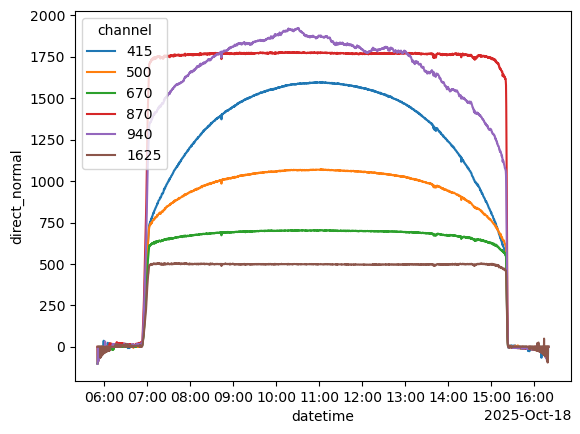

In [19]:
# first glance
f,a = plt.subplots()
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime', ax = a)
# at = a.twinx()
# cm.plot(ax= at)

In [33]:
out = helpers.get_langleys(ds, fnmet, 
                                        None,
                                        # lt,     
                                        langley_airmass_limits=(2.5, 4.5),
                                        clean = False,
                                        # test = True
                                       )
lang_am, lang_pm = out
if 1:
    lang_am.langleys = lang_am.langleys.dropna()
    
    lang_am = lang_am.clean(threshold=2, 
                  # use_channels=[500,]
                 )['langley']
if 1:
    lang_pm.langleys = lang_pm.langleys.dropna()
    
    lang_pm = lang_pm.clean(threshold=2, 
                  # use_channels=[500,]
                 )['langley']

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/Users/htelg/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()


skewness: -0.0458	 skewscale:2.1833
skewness: -0.0191	 skewscale:2.0766
skewness: -0.0047	 skewscale:2.0187
skewness: -0.0232	 skewscale:2.0927
skewness: -0.0284	 skewscale:2.1138
skewness: -0.0178	 skewscale:2.0711
skewness: -0.0119	 skewscale:2.0474
skewness: -0.0063	 skewscale:2.0253
skewness: 0.0216	 skewscale:2.0865
skewness: 0.0116	 skewscale:2.0462
skewness: 0.0232	 skewscale:2.0927
skewness: -0.2022	 skewscale:2.8088
skewness: -0.1815	 skewscale:2.7259
skewness: -0.1372	 skewscale:2.5490
skewness: -0.1158	 skewscale:2.4634
skewness: -0.0566	 skewscale:2.2262
skewness: -0.0540	 skewscale:2.2162
skewness: -0.0466	 skewscale:2.1864
skewness: -0.0439	 skewscale:2.1754
skewness: -0.0959	 skewscale:2.3836


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

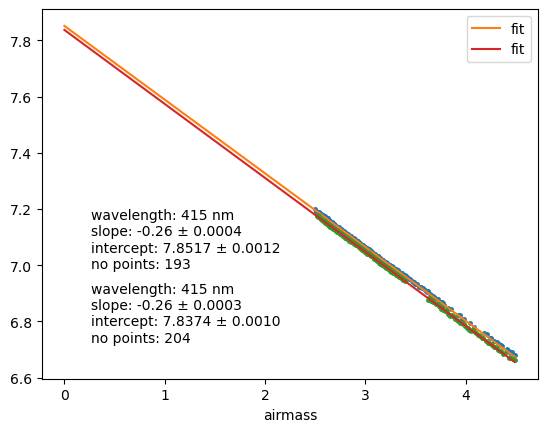

In [34]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, 
             ax = a
            )

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

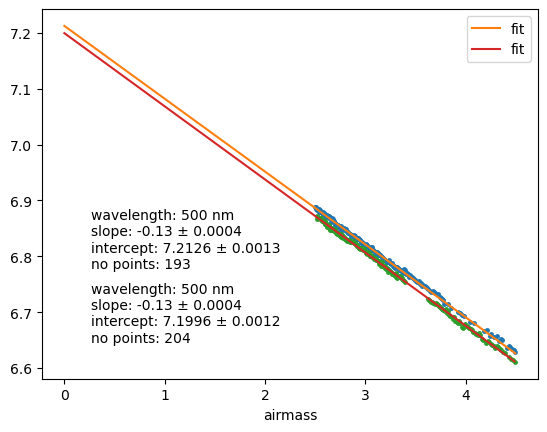

In [35]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

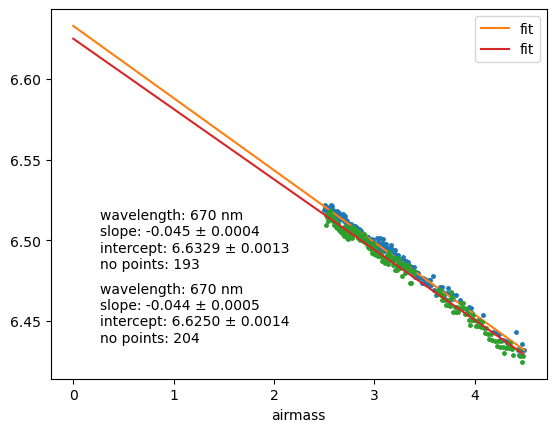

In [36]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

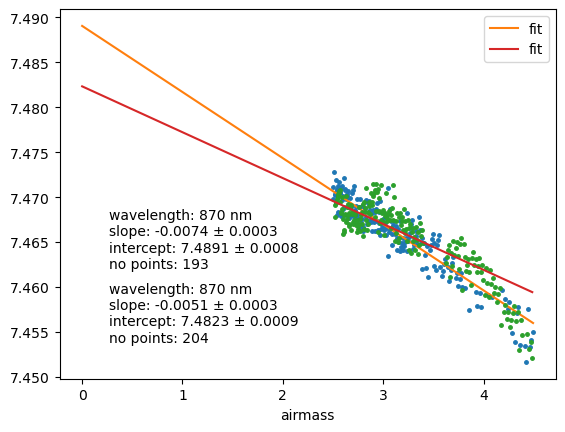

In [37]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

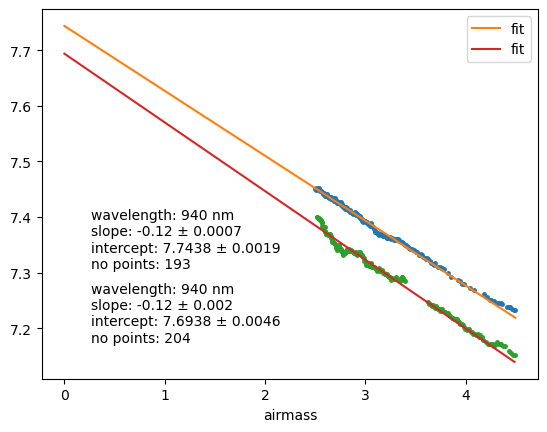

In [38]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

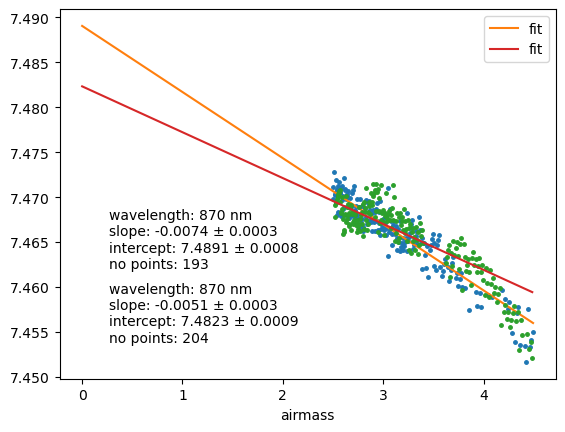

In [39]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

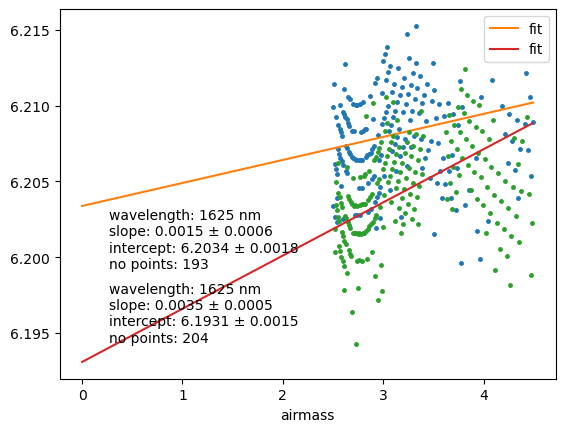

In [40]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [42]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True, parents=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.3/langley_am_frc_648_v0.1_20251018.nc')

In [43]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.3/langley_pm_frc_648_v0.1_20251018.nc')

### 20251017

In [47]:
%matplotlib inline

In [48]:
date = '1017'
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_2025{date}.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_2025{date}_preliminary.nc'

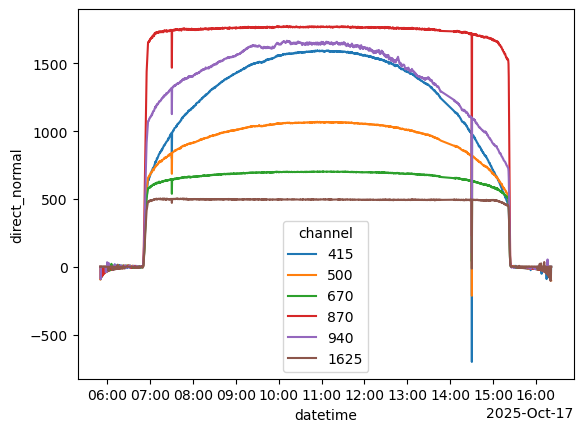

In [49]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [50]:
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, lt,     
                                        langley_airmass_limits=(2.5, 4.5),
                                        clean = False,
                                       )
# when there are 
if 0:
    lang_am.langleys = lang_am.langleys.dropna()
    
    lang_am = lang_am.clean(threshold=2, 
                  # use_channels=[500,]
                 )['langley']

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/Users/htelg/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/Users/htelg/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()
/Users/htelg/pr

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

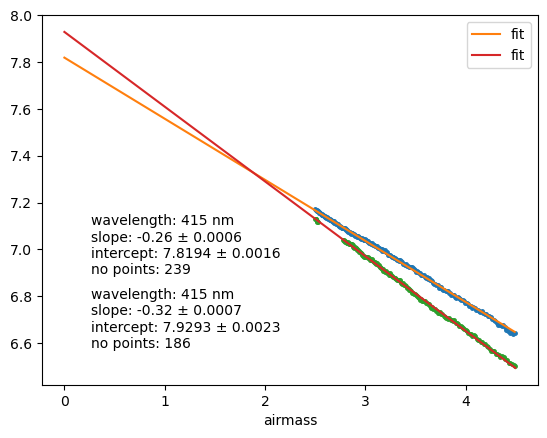

In [51]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

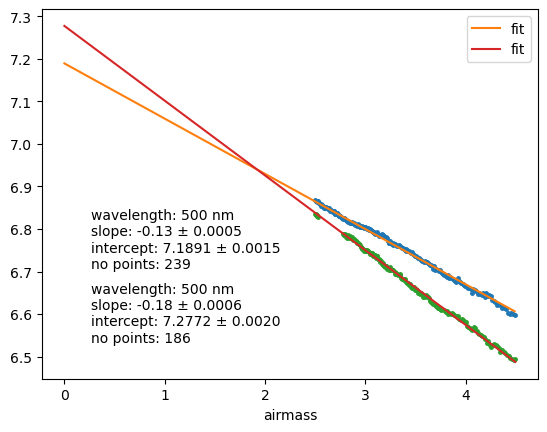

In [52]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

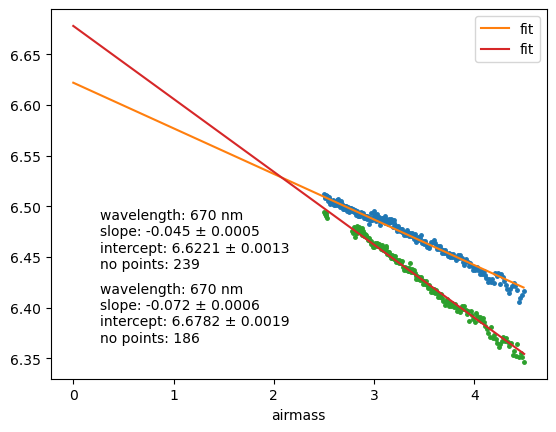

In [53]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

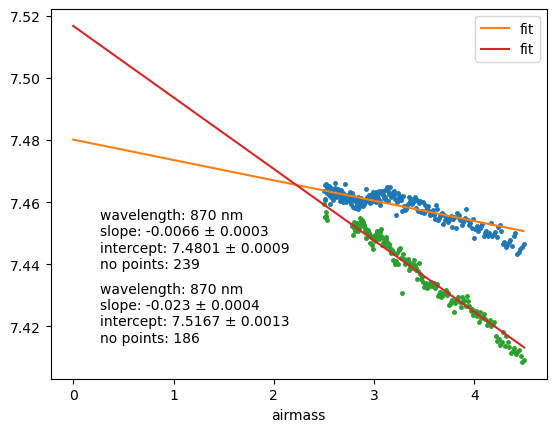

In [54]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

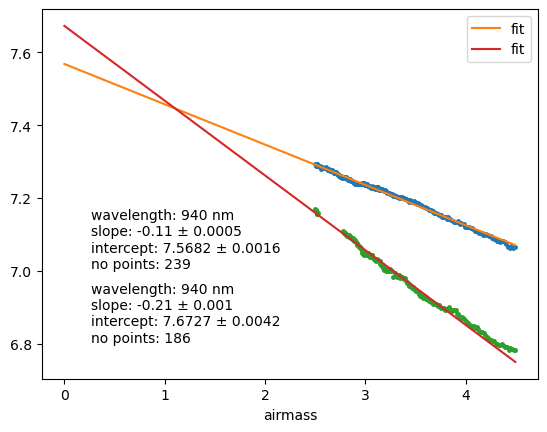

In [55]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

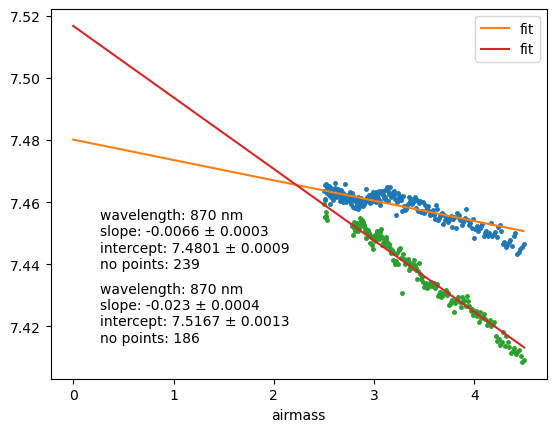

In [56]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

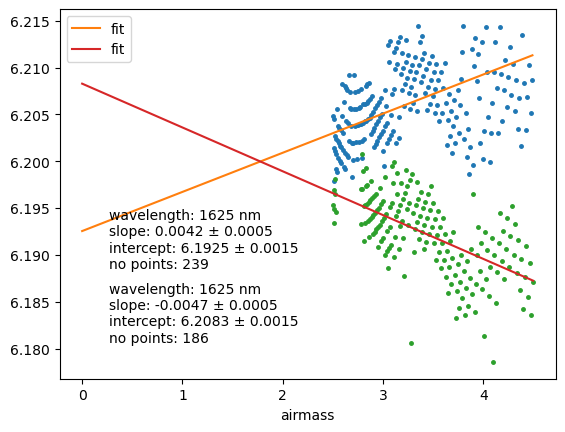

In [57]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [58]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True, parents=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.3/langley_am_frc_648_v0.1_20251017.nc')

In [59]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.3/langley_pm_frc_648_v0.1_20251017.nc')

### 20251016

In [60]:
%matplotlib inline

In [61]:
date = '1016'
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_2025{date}.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_2025{date}_preliminary.nc'

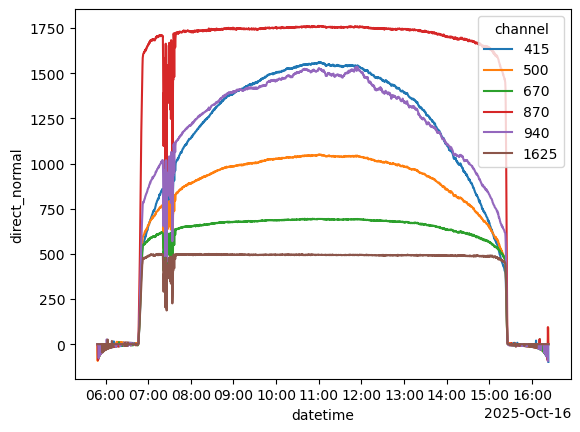

In [62]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [ ]:
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, lt,     
                                        langley_airmass_limits=(2.5, 4.5),
                                        clean = False,
                                       )

if 0:
    lang_am.langleys = lang_am.langleys.dropna()
    
    lang_am = lang_am.clean(threshold=2, 
                  # use_channels=[500,]
                 )['langley']

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

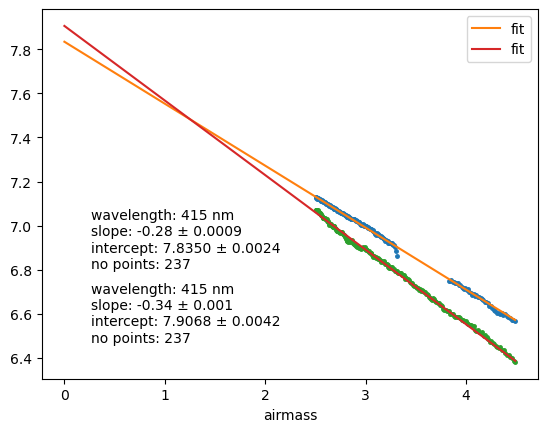

In [70]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

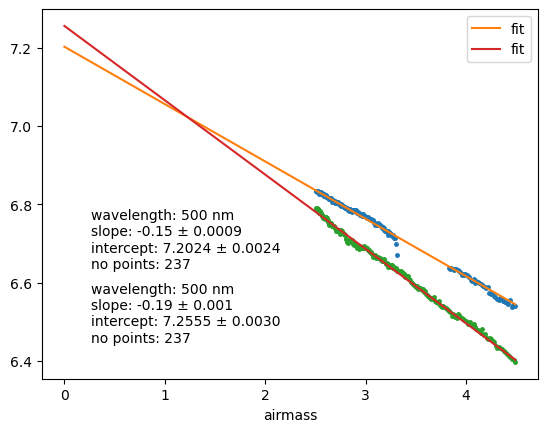

In [71]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

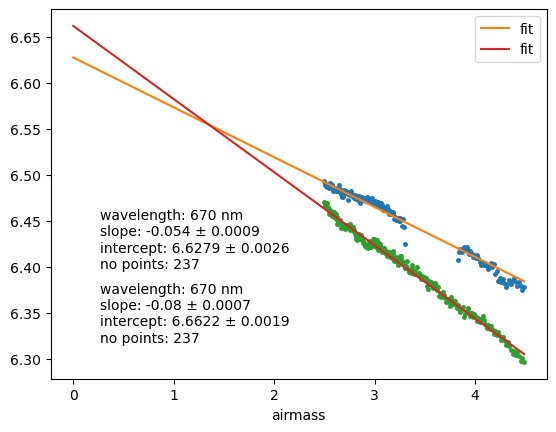

In [72]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

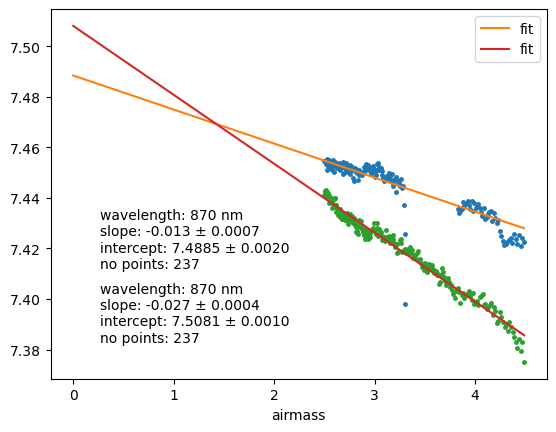

In [73]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

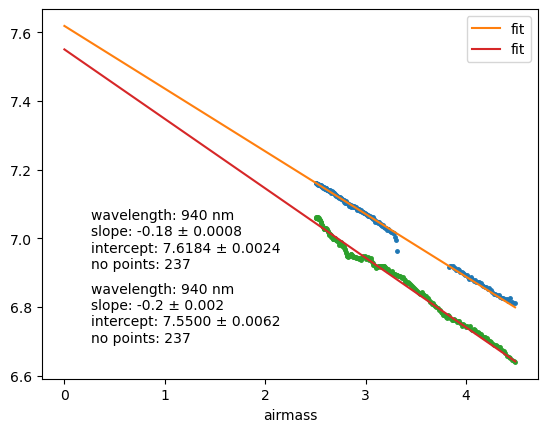

In [74]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

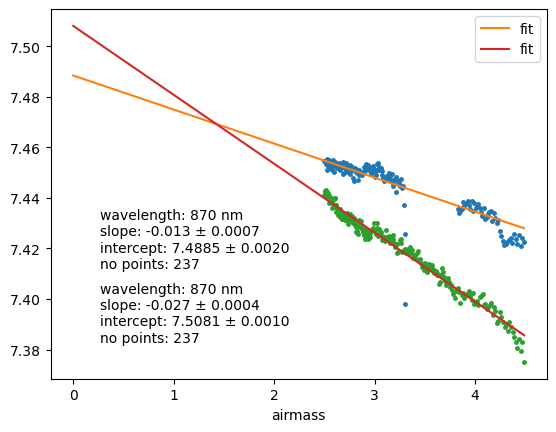

In [75]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

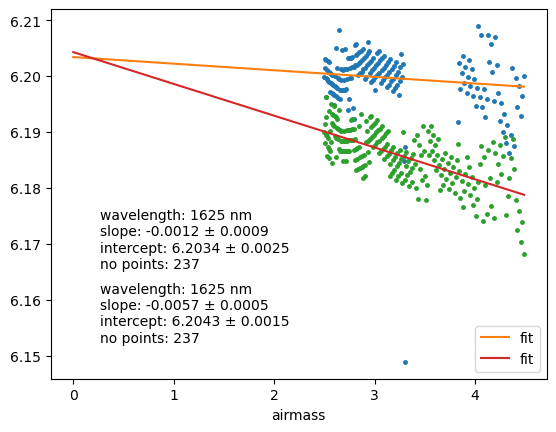

In [76]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [77]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True, parents=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.3/langley_am_frc_648_v0.1_20251016.nc')

In [78]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.3/langley_pm_frc_648_v0.1_20251016.nc')

### 20251015

In [79]:
%matplotlib inline

In [80]:
date = '1015'
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_2025{date}.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_2025{date}_preliminary.nc'

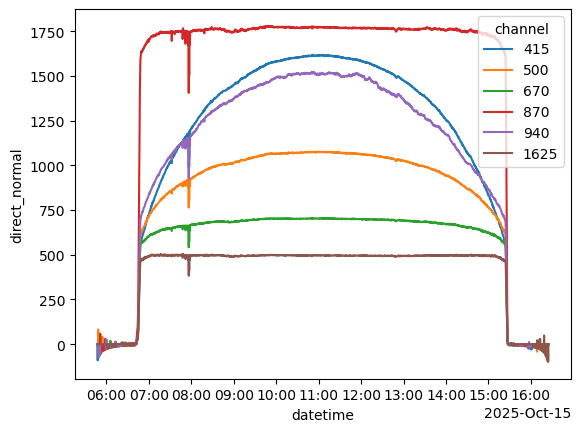

In [81]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [82]:
reload(helpers)
reload(helpers.atmspec)
reload(helpers.atmspec.atmlangcalib)
reload(helpers.atmcop)

<module 'atmPy.aerosols.physics.column_optical_properties' from '/Users/htelg/prog/atm-py/atmPy/aerosols/physics/column_optical_properties.py'>

In [83]:
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, lt,     
                                        langley_airmass_limits=(2.5, 4.5),
                                        clean = False,
                                       )
if 0:
    lang_am.langleys = lang_am.langleys.dropna()
    
    lang_am = lang_am.clean(threshold=2, 
                  # use_channels=[500,]
                 )['langley']

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/Users/htelg/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/Users/htelg/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()
/Users/htelg/pr

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

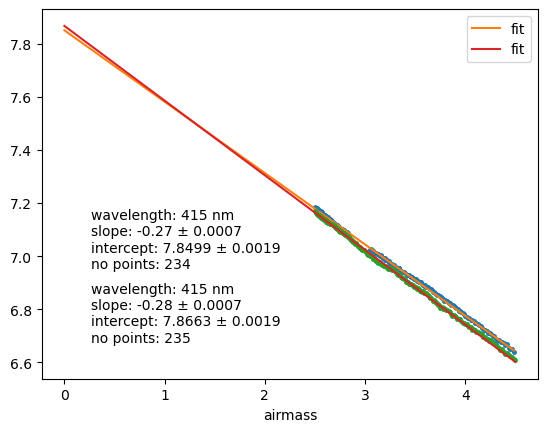

In [84]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

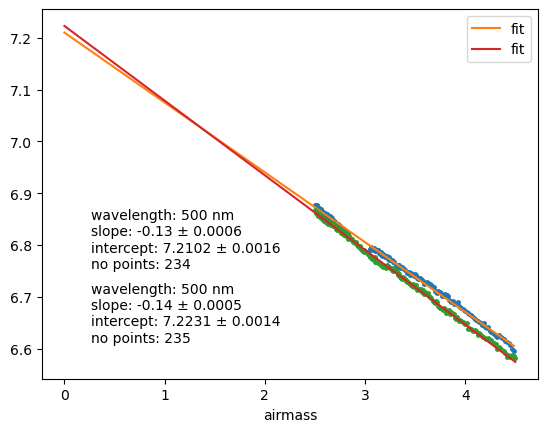

In [85]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

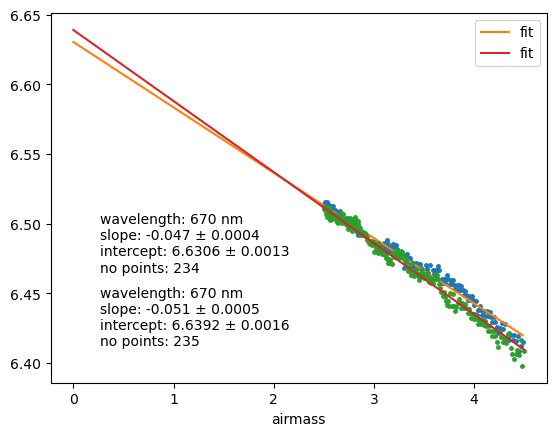

In [86]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

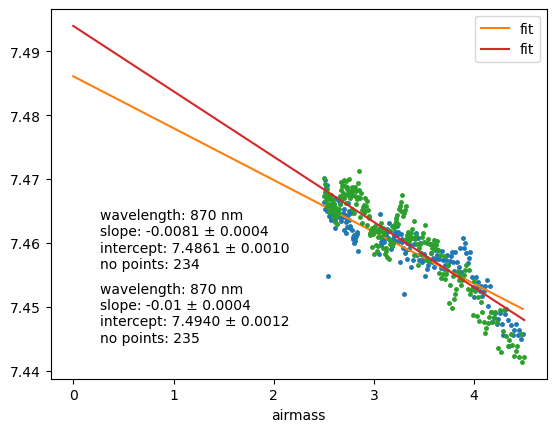

In [87]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

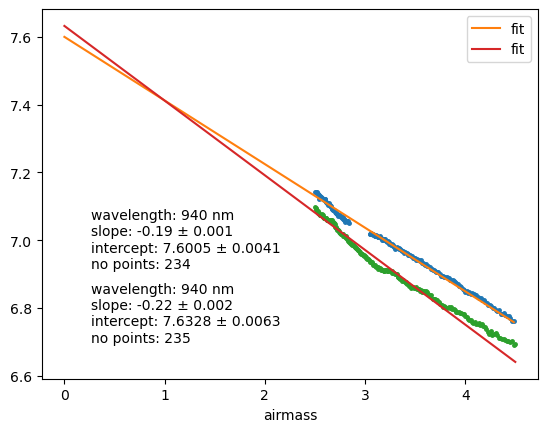

In [88]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

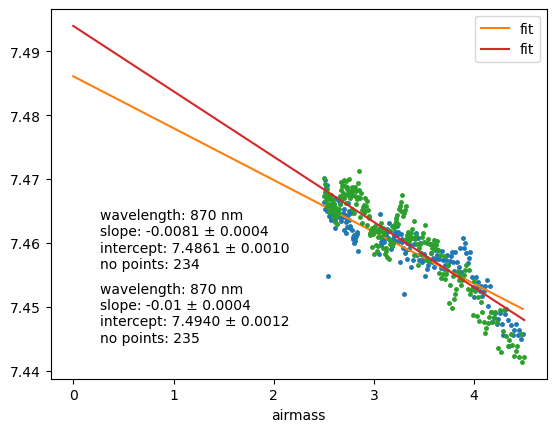

In [89]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

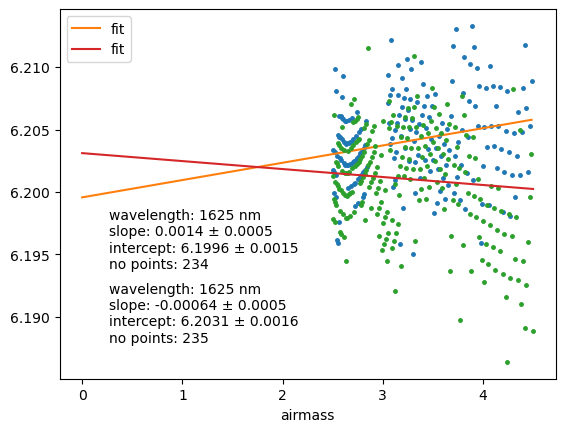

In [90]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [91]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True, parents=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.3/langley_am_frc_648_v0.1_20251015.nc')

In [92]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.3/langley_pm_frc_648_v0.1_20251015.nc')

### 20251014

In [93]:
%matplotlib inline

In [94]:
date = '1014'
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_2025{date}.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_2025{date}_preliminary.nc'

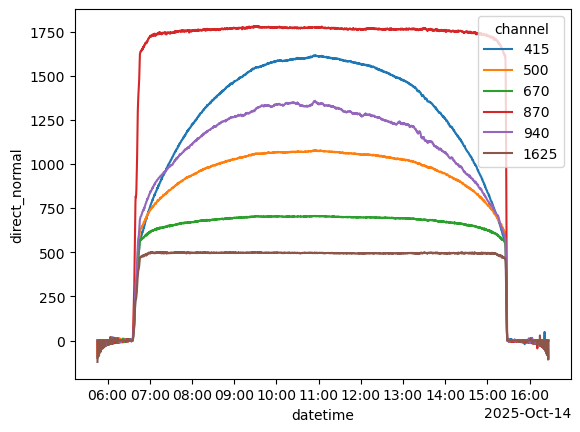

In [95]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [96]:
reload(helpers)

<module 'helpers' from '/Users/htelg/projects/cmpaign_2025_PMOD/helpers.py'>

In [97]:
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, lt,     
                                        langley_airmass_limits=(2.5, 4.5),
                                       )

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/Users/htelg/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/Users/htelg/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()
/Users/htelg/pr

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

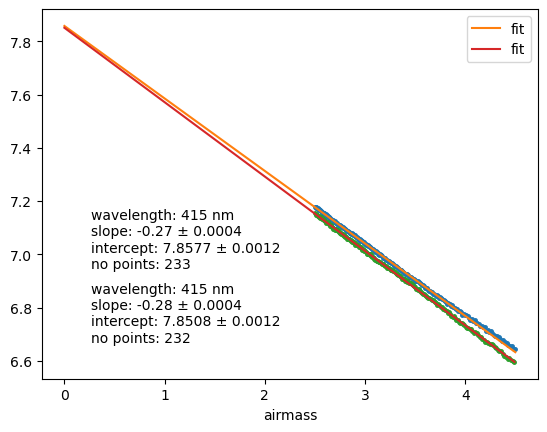

In [98]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

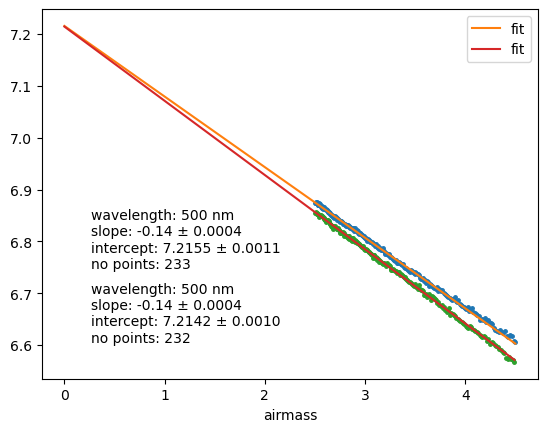

In [99]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

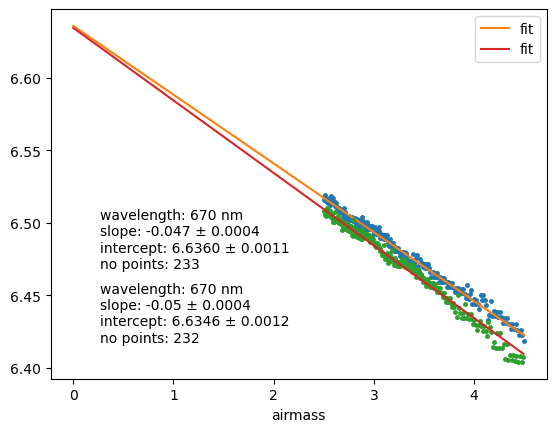

In [100]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

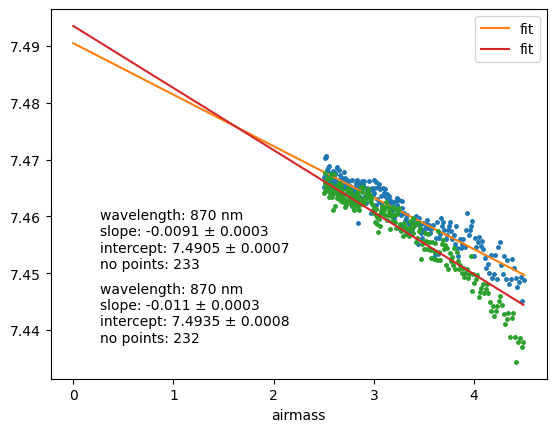

In [101]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

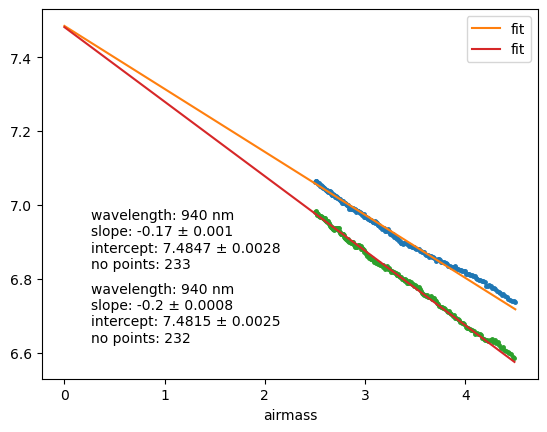

In [102]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

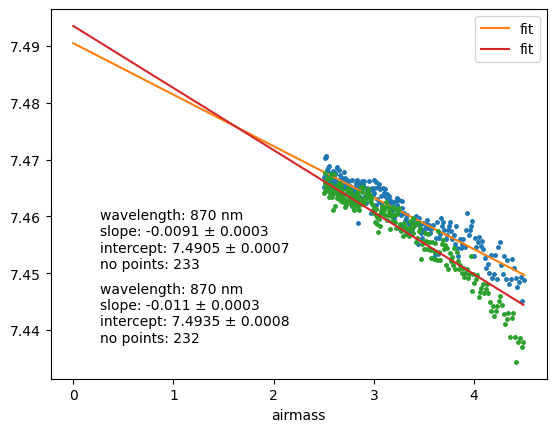

In [103]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

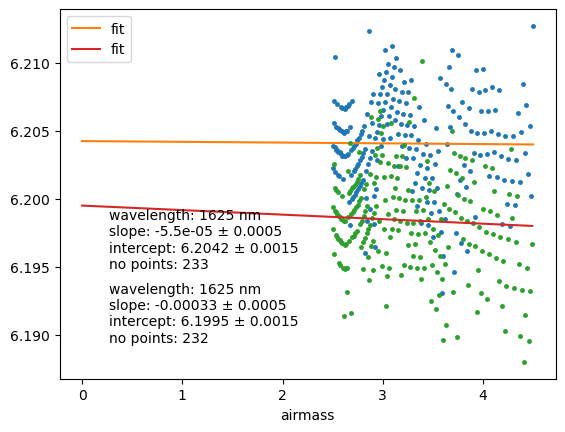

In [104]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [105]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True, parents=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.3/langley_am_frc_648_v0.1_20251014.nc')

In [106]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.3/langley_pm_frc_648_v0.1_20251014.nc')

### 20251013

In [107]:
%matplotlib inline

In [108]:
date = '1013'
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_2025{date}.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_2025{date}_preliminary.nc'

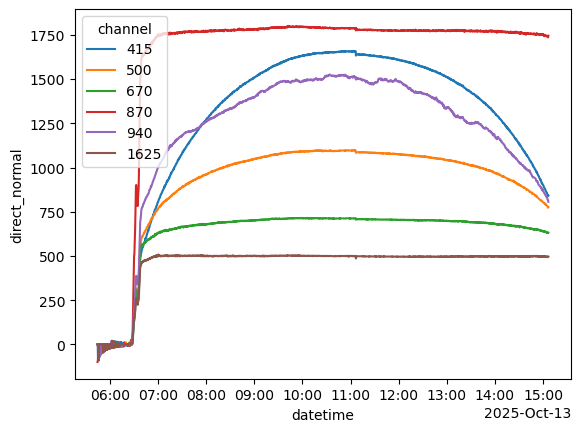

In [109]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [110]:
reload(helpers)

<module 'helpers' from '/Users/htelg/projects/cmpaign_2025_PMOD/helpers.py'>

In [113]:
# apply
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, 
                                        # lt,   
                                        None,
                                        langley_airmass_limits=(2.5, 4.5),
                                       )

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/Users/htelg/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

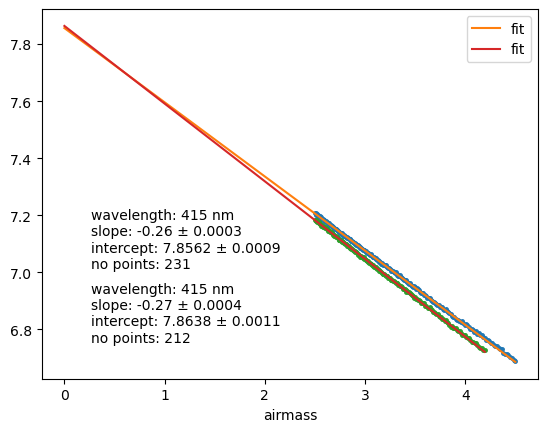

In [114]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

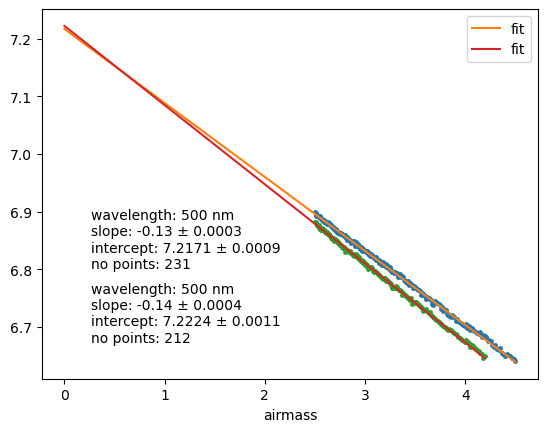

In [115]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

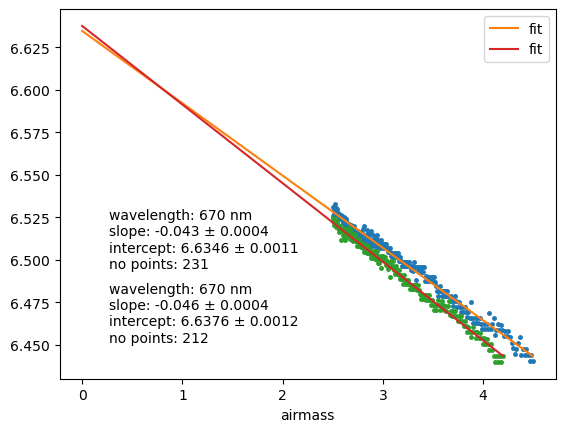

In [116]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

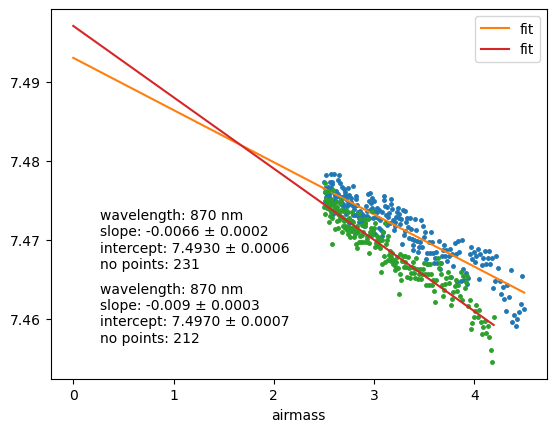

In [117]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

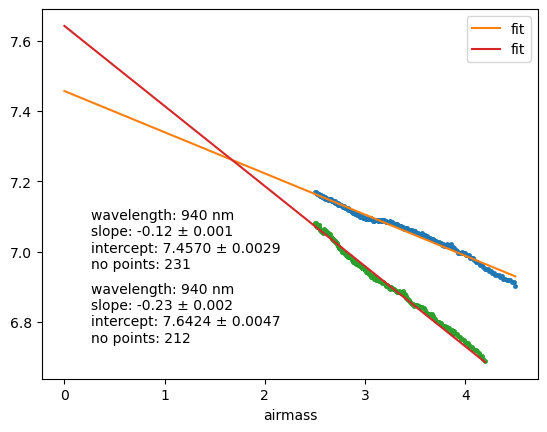

In [118]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

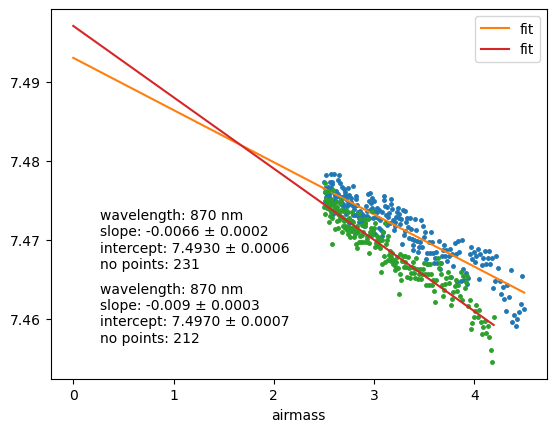

In [119]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

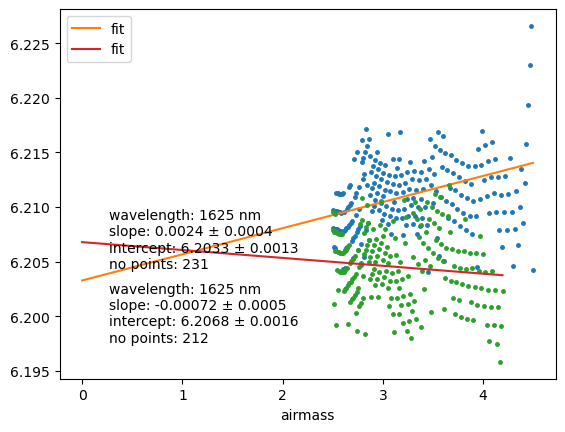

In [120]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [121]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True, parents=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.3/langley_am_frc_648_v0.1_20251013.nc')

In [122]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.3/langley_pm_frc_648_v0.1_20251013.nc')

### 20251012

In [123]:
%matplotlib inline

In [124]:
date = '1012'
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_2025{date}.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_2025{date}_preliminary.nc'

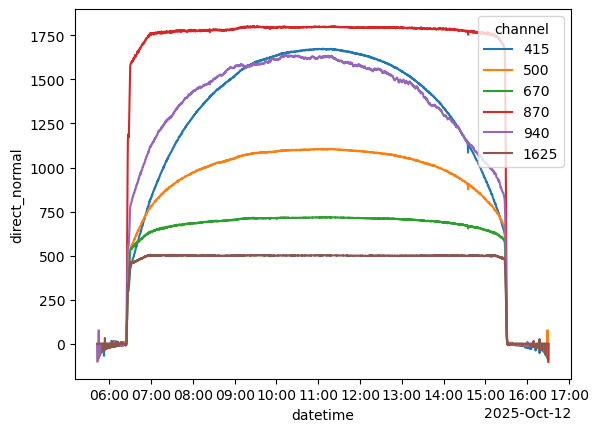

In [125]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [126]:
reload(helpers)

<module 'helpers' from '/Users/htelg/projects/cmpaign_2025_PMOD/helpers.py'>

In [129]:
# apply
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, 
                                        # lt,
                                        None,
                                        langley_airmass_limits=(2.5, 4.5),
                                       )

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/Users/htelg/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

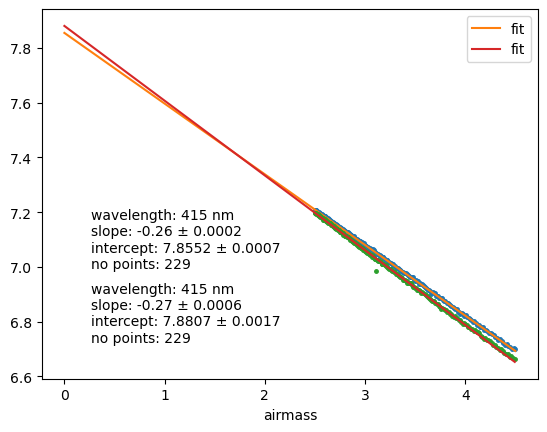

In [130]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

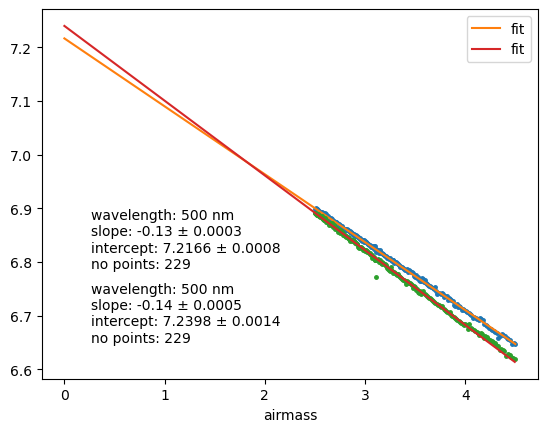

In [131]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

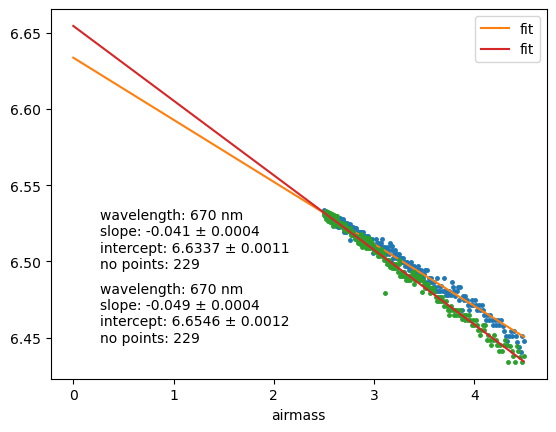

In [132]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

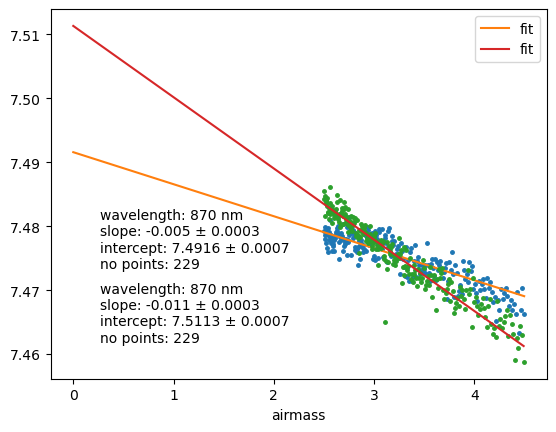

In [133]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

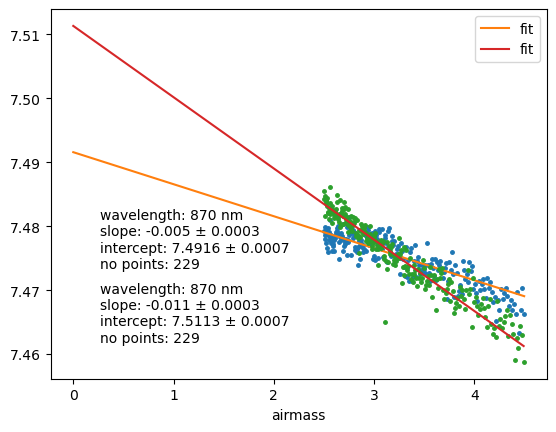

In [134]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

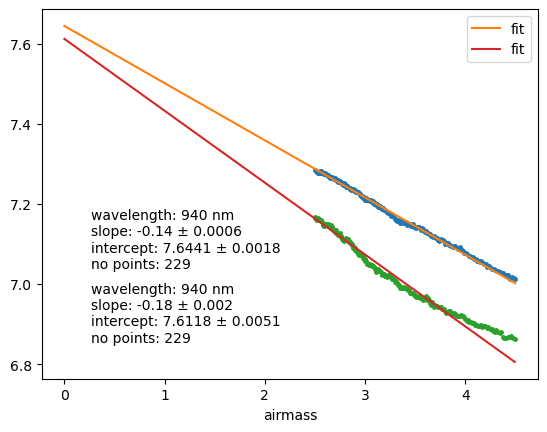

In [135]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

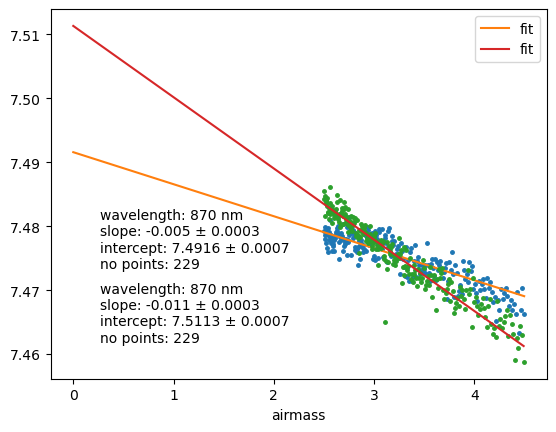

In [136]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

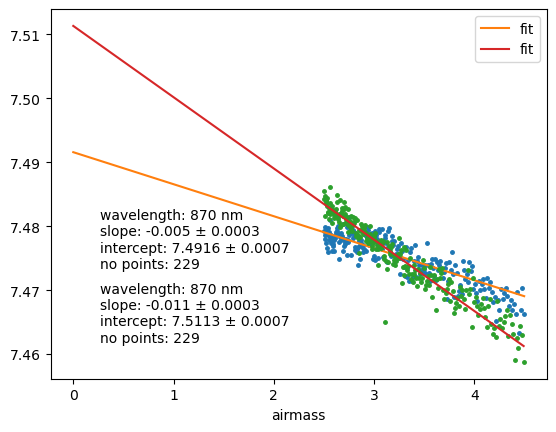

In [137]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

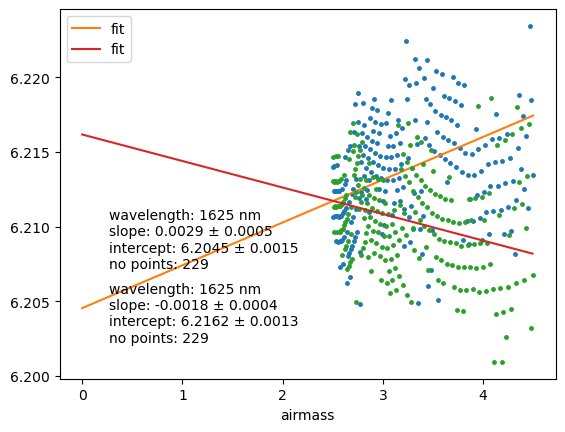

In [138]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

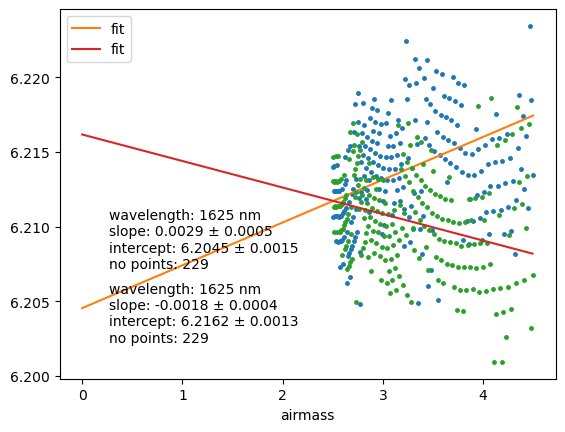

In [139]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [140]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.3/langley_am_frc_648_v0.1_20251012.nc')

In [141]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.3/langley_pm_frc_648_v0.1_20251012.nc')

### 20251011

In [142]:
%matplotlib inline

In [143]:
date = '1011'
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_2025{date}.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_2025{date}_preliminary.nc'

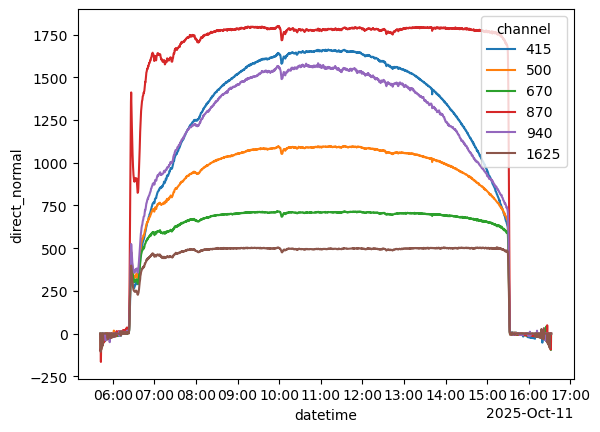

In [144]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [145]:
reload(helpers)

<module 'helpers' from '/Users/htelg/projects/cmpaign_2025_PMOD/helpers.py'>

In [148]:
# apply
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, 
                                        # lt,
                                        None
                                       )

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/Users/htelg/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

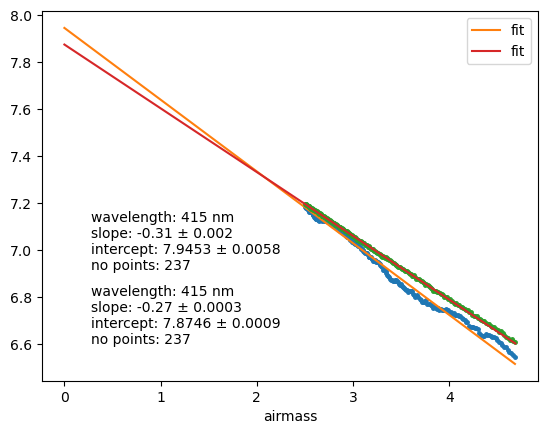

In [149]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

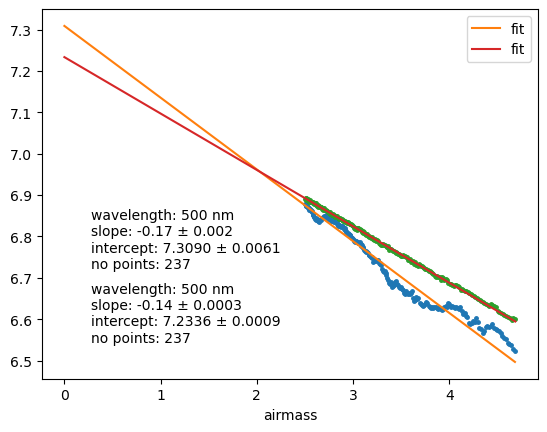

In [150]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

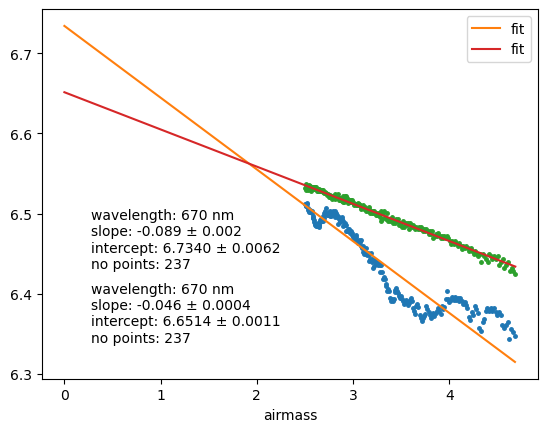

In [151]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

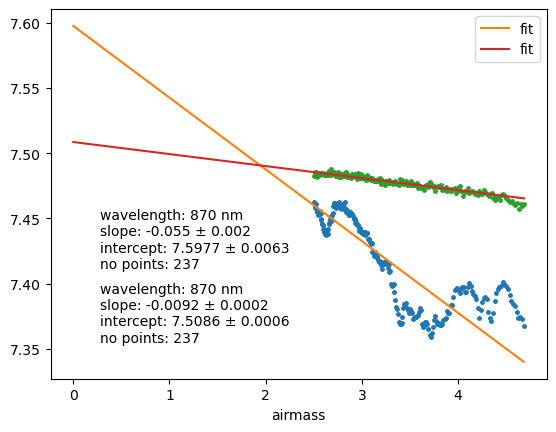

In [152]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

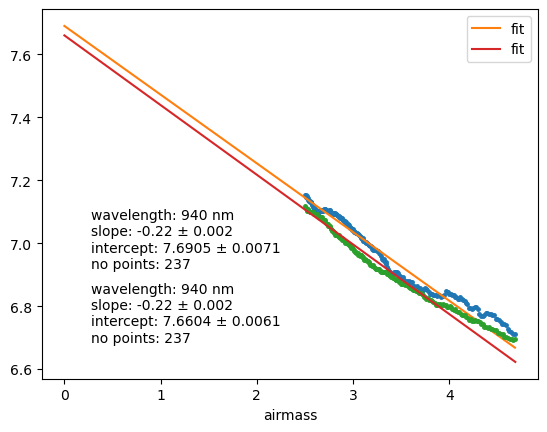

In [153]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

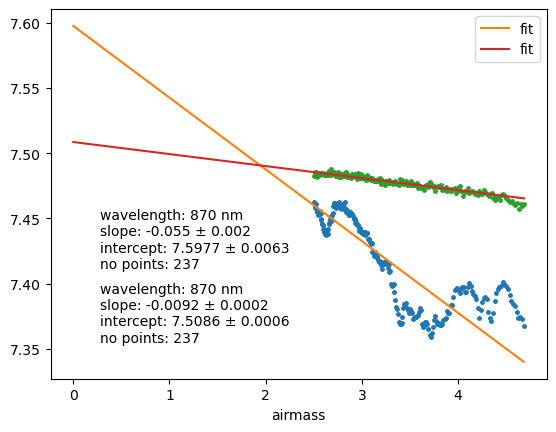

In [154]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

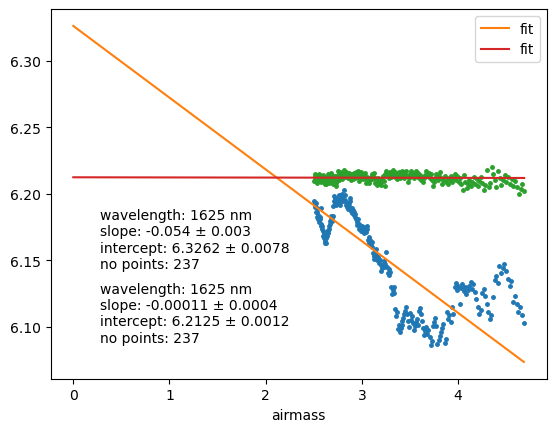

In [155]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [156]:
# lang = lang_am
# p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
# p2out.parent.mkdir(exist_ok=True)
# if not p2out.is_file():
#     lang.save2netcdf(p2out)
# else:
#     print('File exist!!!')
# p2out    

In [157]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.3/langley_pm_frc_648_v0.1_20251011.nc')

### 20251002

In [158]:
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20251002.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_20251002_preliminary.nc'
lt = lt_pre_648

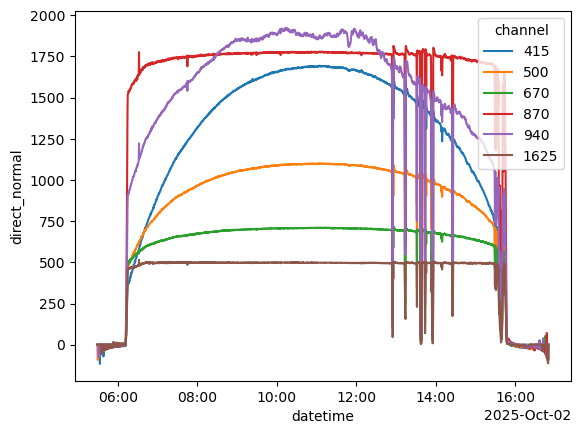

In [159]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [160]:
reload(helpers)

<module 'helpers' from '/Users/htelg/projects/cmpaign_2025_PMOD/helpers.py'>

In [161]:
# apply
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, lt)

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/Users/htelg/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/Users/htelg/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()
/Users/htelg/pr

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

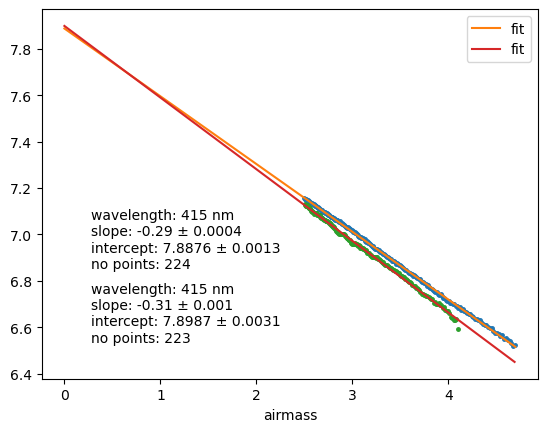

In [162]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

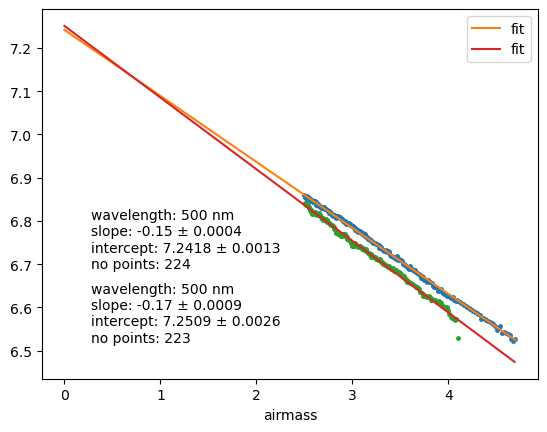

In [163]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

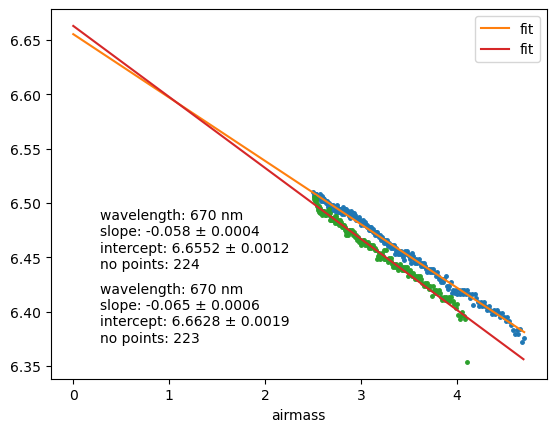

In [164]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

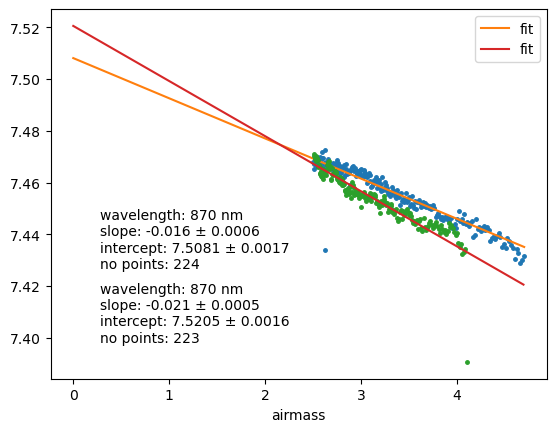

In [165]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

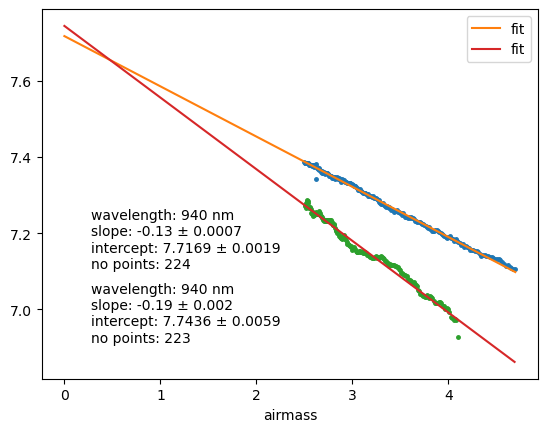

In [166]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

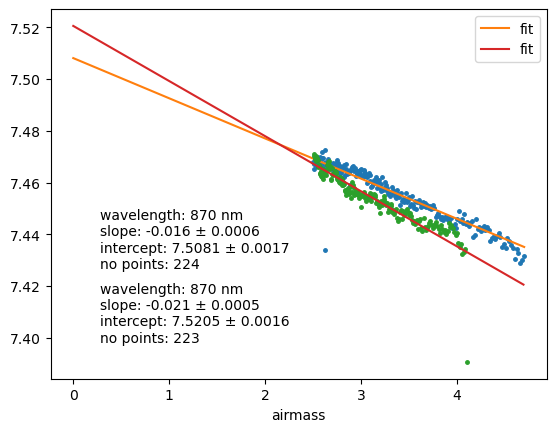

In [167]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

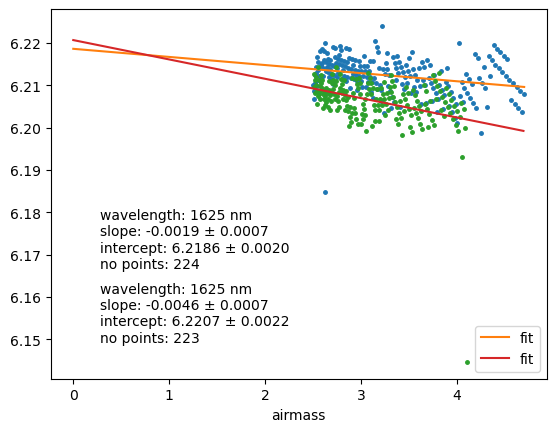

In [168]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [169]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.3/langley_am_frc_648_v0.1_20251002.nc')

In [170]:
# lang = lang_pm
# p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
# p2out.parent.mkdir()
# if not p2out.is_file():
#     lang.save2netcdf(p2out)
# else:
#     print('File exist!!!')
# p2out    

### 20250928

In [195]:
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250928.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_20250928_preliminary.nc'

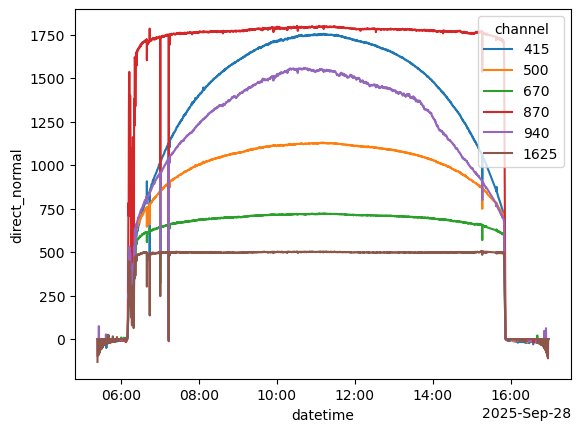

In [196]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [197]:
reload(helpers)

<module 'helpers' from '/Users/htelg/projects/cmpaign_2025_PMOD/helpers.py'>

In [209]:
# apply
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, 
                                        # lt,
                                        None
                                       )

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/Users/htelg/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()


In [210]:
if 1:
    lang_am.langleys = lang_am.langleys.dropna()
    
    lang_am = lang_am.clean(threshold=3, 
                  # use_channels=[500,]
                 )['langley']
if 1:
    lang_pm.langleys = lang_pm.langleys.dropna()
    
    lang_pm = lang_pm.clean(threshold=3, 
                  # use_channels=[500,]
                 )['langley']

skewness: -0.0985	 skewscale:3.8866
skewness: -0.0983	 skewscale:3.8849
skewness: -0.1035	 skewscale:3.9313
skewness: -0.1228	 skewscale:4.1053
skewness: -0.1231	 skewscale:4.1080
skewness: -0.1225	 skewscale:4.1028
skewness: 0.0017	 skewscale:3.0156
skewness: 0.0782	 skewscale:3.7037


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

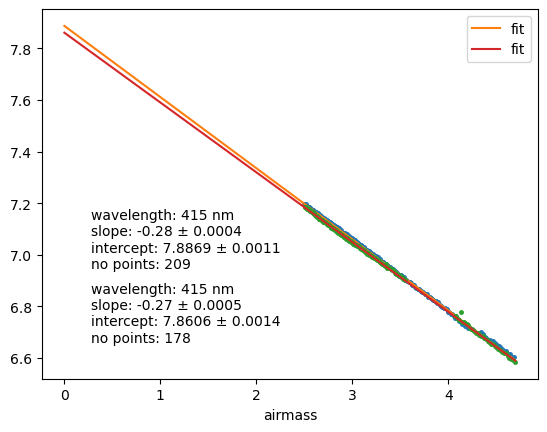

In [213]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

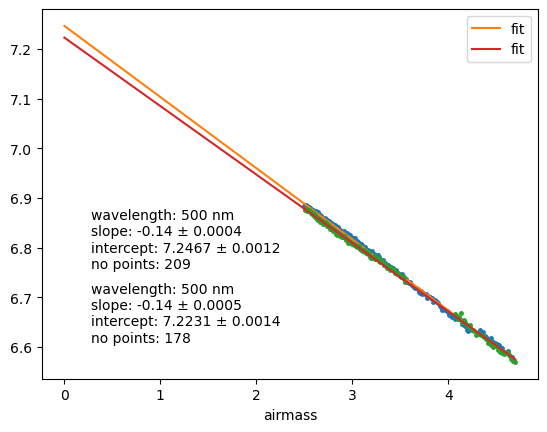

In [214]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

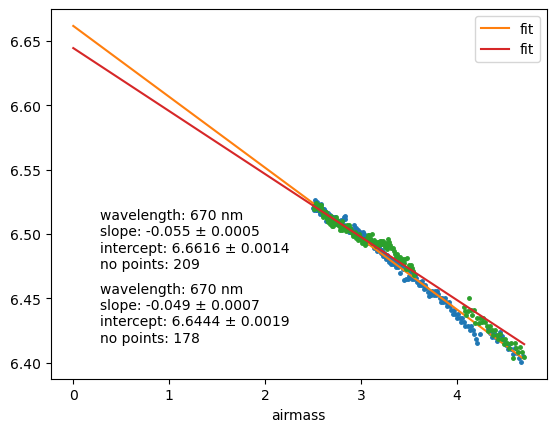

In [215]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

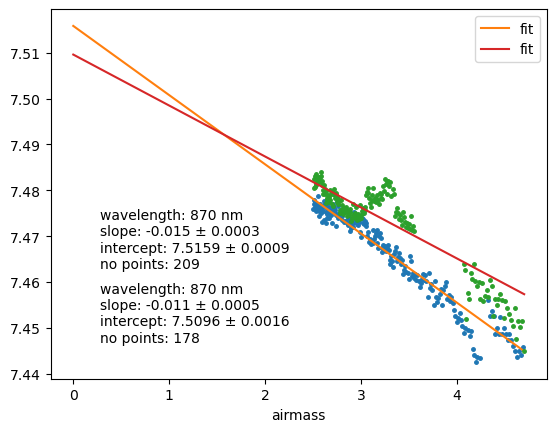

In [216]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

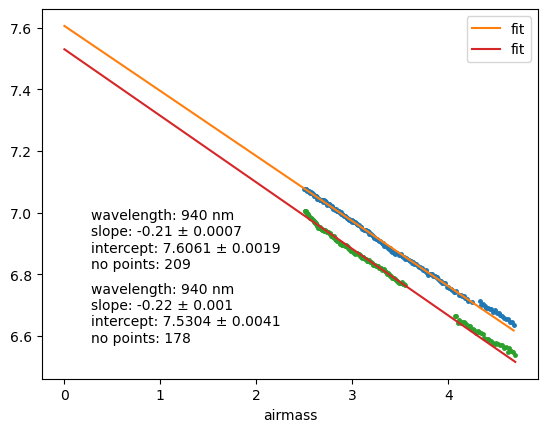

In [217]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

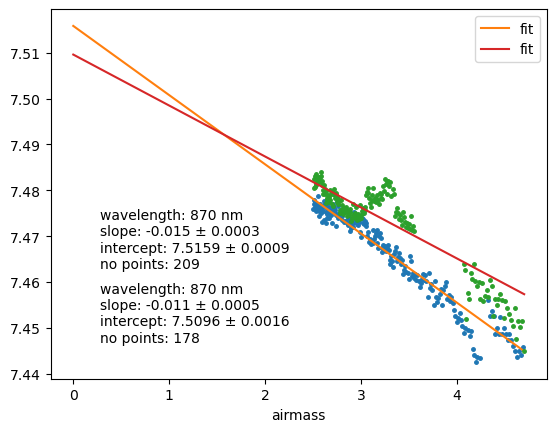

In [218]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

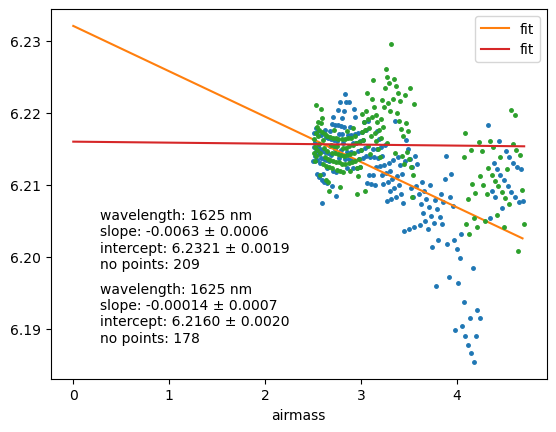

In [219]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [220]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.3/langley_am_frc_648_v0.1_20250928.nc')

In [41]:
# lang = lang_pm
# p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
# p2out.parent.mkdir()
# if not p2out.is_file():
#     lang.save2netcdf(p2out)
# else:
#     print('File exist!!!')
# p2out    

# Condition langleyss

In [1]:
import atmPy.radiation.retrievals.langley_calibration as atmlc


In [2]:
prefix = '/Users/htelg'

In [34]:
reload(atmlc)

<module 'atmPy.radiation.retrievals.langley_calibration' from '/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py'>

In [35]:
p2fld = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.3/')
lt = atmlc.open_langleys(p2fld)

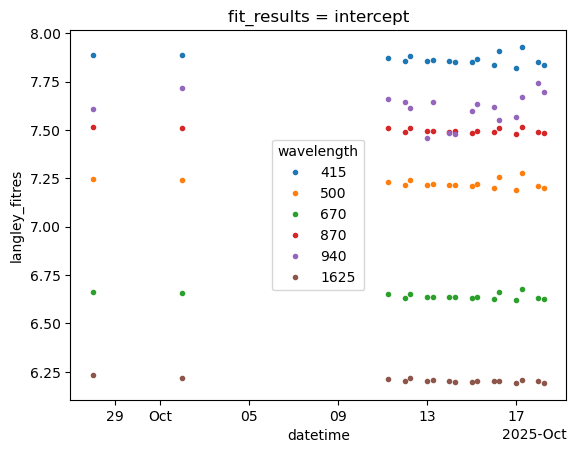

In [36]:
out = lt.dataset.langley_fitres.sel(fit_results = 'intercept').plot.line(x = 'datetime', ls = '', marker = '.')

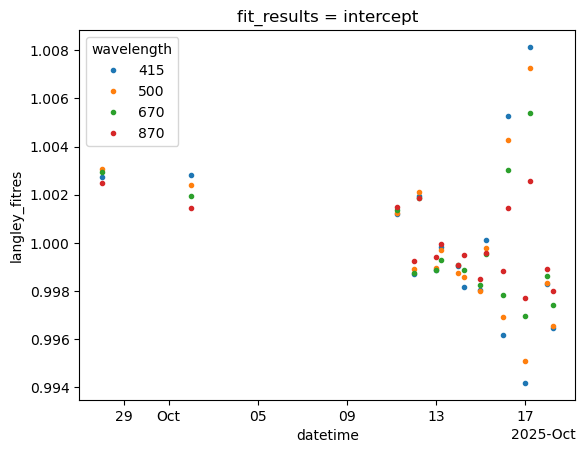

In [37]:
# any sudden steps?
bla = lt.dataset.langley_fitres.sel(fit_results = 'intercept', wavelength = [415, 500, 670, 870])
bla /= bla.mean('datetime')
out = bla.plot.line(x = 'datetime', ls = '', marker = '.')

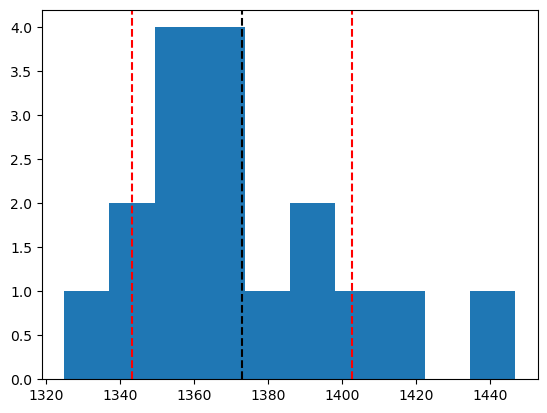

In [38]:
f,a = plt.subplots()
v0s = lt.dataset.langley_fitres.sel(wavelength = 500, fit_results = 'intercept')
v0s = np.exp(v0s)
a.hist(v0s, bins = 10)
a.axvline(v0s.mean(), ls = '--', color = 'black')
a.axvline(v0s.mean() + v0s.std(), ls = '--', color = 'red')
a.axvline(v0s.mean() - v0s.std(), ls = '--', color = 'red')

# remove outliers

In [39]:
import copy

# at individual stderr

In [40]:
lttrunc = copy.deepcopy(lt)
ds = lttrunc.dataset
# remove largest stderr
stderr = ds.langley_fitres.sel(fit_results = 'intercept_stderr')
lttrunc.dataset['langley_fitres'] = ds.langley_fitres.where(stderr < stderr.quantile(0.9, dim = 'datetime'))

# remove outliers based on quantiles
ds = lttrunc.dataset
interc = ds.langley_fitres.sel(fit_results = 'intercept')
where = np.logical_and(interc.quantile(0.1, dim = 'datetime') < interc, interc < interc.quantile(0.9, dim = 'datetime'))
lttrunc.dataset['langley_fitres'] = ds.langley_fitres.where(where)

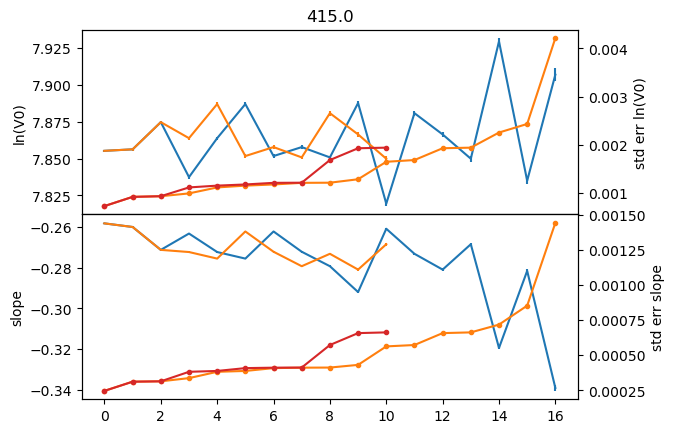

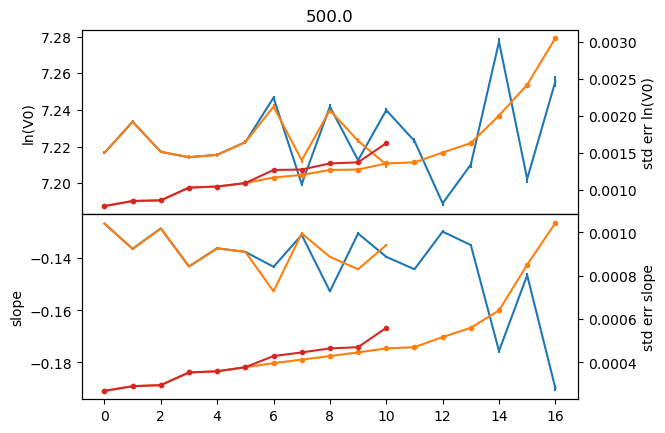

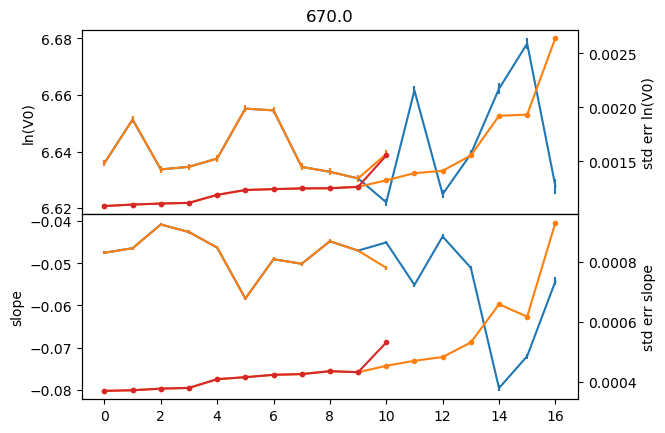

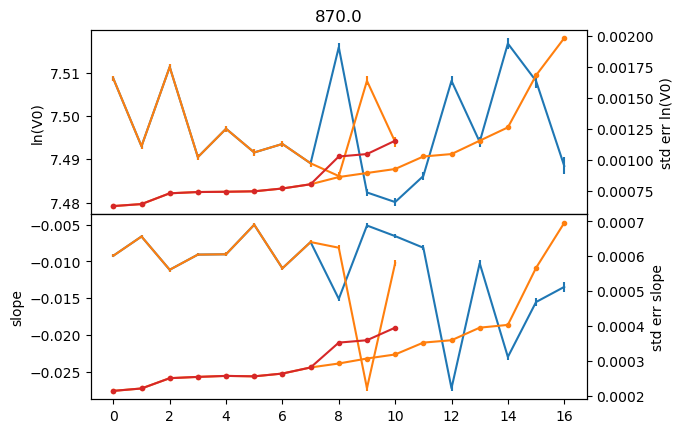

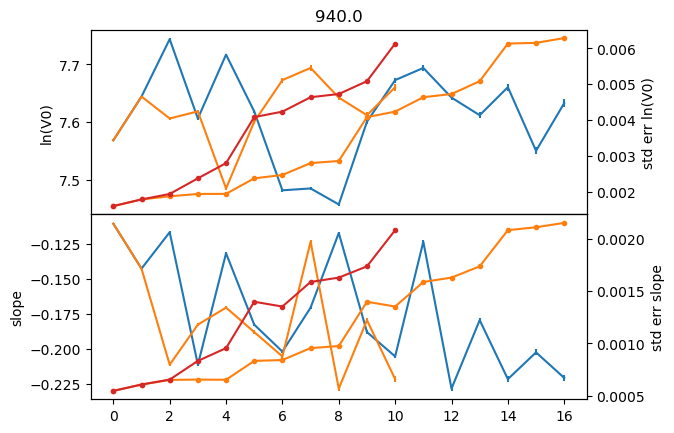

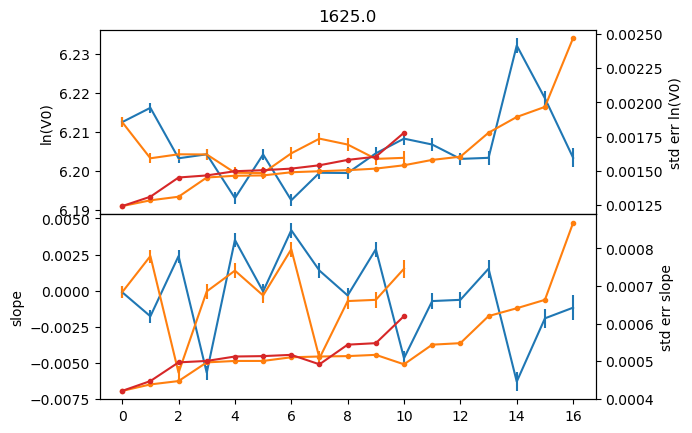

In [41]:
# all sorted by the stderr of the individual channel
wls = lt.dataset.wavelength
for wl in wls:
    f,aa = lt.plot_sorted(wl = wl, wlsort=wl)
    f,aa = lttrunc.plot_sorted(wl = wl, wlsort=wl, aa = aa)
    # aa
    aa[0].set_title(float(wl))

In [46]:
lt.V0_simple.OD_uncertainty

<xarray.DataArray 'OD_uncertainty' (wavelength: 6)> Size: 48B
array([0.04380835, 0.03666266, 0.02715157, 0.02161986, 0.11886338,
       0.01860623])
Coordinates:
  * wavelength  (wavelength) int64 48B 415 500 670 870 940 1625
Attributes:
    description:  (V0_std / V0 * osub) + 0.005. osub: one-sided upper bound f...

In [47]:
lttrunc.V0_simple.OD_uncertainty

<xarray.DataArray 'OD_uncertainty' (wavelength: 6)> Size: 48B
array([0.02533416, 0.02271234, 0.01958019, 0.0188503 , 0.0934204 ,
       0.01091989])
Coordinates:
  * wavelength  (wavelength) int64 48B 415 500 670 870 940 1625
    quantile    float64 8B 0.9
Attributes:
    description:  (V0_std / V0 * osub) + 0.005. osub: one-sided upper bound f...

In [48]:
lttrunc.V0_simple.V0_std/lttrunc.V0_simple.V0

<xarray.DataArray (wavelength: 6)> Size: 48B
array([0.01276412, 0.01111835, 0.00915225, 0.00869409, 0.05550308,
       0.00371602])
Coordinates:
  * wavelength  (wavelength) int64 48B 415 500 670 870 940 1625
    quantile    float64 8B 0.9
Attributes:
    description:  nbiased standard deviation, ddof = 1

In [49]:
p2f = pl.Path().resolve() / 'data/V0_simple_648.nc'
# p2f.unlink()
if p2f.exists():
    print(f'File already exists: {p2f}')
else:
    lttrunc.V0_simple.to_netcdf(p2f)
    print(f'Saved to {p2f}')

Saved to /Users/htelg/projects/cmpaign_2025_PMOD/data/V0_simple_648.nc


# asdf